## Solve the first order differential equations
$\frac{dy}{dt} = f(t,y)$, $y(t_0) = y_0$ and $a \le t \le b$.

For example,
$\frac{dy}{dt} = -5 t y^2+\frac{5}{t}-\frac{1}{t^2}$, $y(0) = 1$ and $1 \le t \le 25$

### write the following function [y]=forwardeuler(a, b,h, y0, f)  as a script file forwardeuler.m 
Otherwise you may notice the following error message:<br>
Error: Function definitions are not permitted in this context.

In [ ]:
function [y]=forwardeuler(a, b,h, y0, f)
% function [y]=forwardeuler(a, b,h, y0, f)
% Forward Euler Method
% end points a and b
% time step h	
% initial condition y0
% input function f

y(1)=y0;

t=a : h : b;
n=length(t);

for i=1:n-1
    y(i+1)=y(i)+h*f(t(i),y(i));
end
end

In [ ]:
function [ y ] = rk4( a,b,h,y0, f)
% function [ y ] = rk4( a,b,h,y0, f)
% Runge-Kutta fourth order method
% end points a and b
% time step h	
% initial condition y0
% input function f

y(1)=y0;

t=a : h : b;
n=length(t);

for i=1:n-1
    f1=f(t(i),y(i));
    Y2=y(i)+0.5*h*f1;
    f2=f(t(i)+h/2, Y2);
    Y3=y(i)+0.5*h*f2;
    f3=f(t(i)+h/2, Y3);
    Y4=y(i)+h*f3;
    f4=f(t(i)+h, Y4);
    y(i+1)=y(i)+(h/6)*(f1+2*f2+2*f3+f4);
end

end

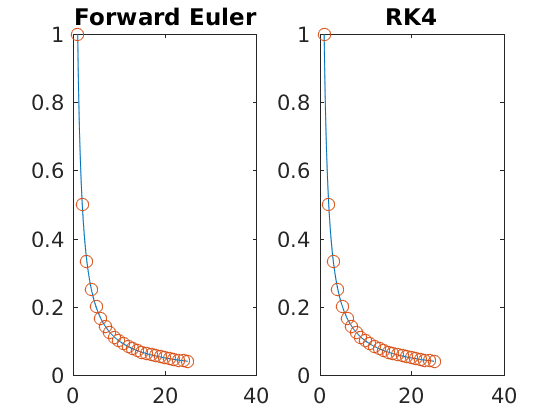

In [1]:
clear all
h= 0.1;
a=1;
b=25;
y0=1;
f=@(t,y) -5*t*y^2+(5/t)-(1/t^2);

[y1] = forwardeuler(a, b, h, y0, f);
[y2] = rk4(a,b,h,y0, f);

t=a : h : b;
t1=a : h*10 : b;
yexact=@(t) 1./t;

figure;

subplot(1,2,1)
plot(t,y1,t1,yexact(t1),'o')
title('Forward Euler')

subplot(1,2,2)
plot(t,y2,t1,yexact(t1),'o')
title('RK4')

\begin{equation}
\begin{split}
\frac{dX}{dt} & = -X - Y,\\
\frac{dY}{dt} & = -pZ + rY + sZ^2 -Z^2Y,\\
\frac{dZ}{dt} & = -q(X+Z).
\end{split}
\end{equation}

<ul>
<li> ice mass ($X$),</li> 
<li> atmospheric carbon dioxide ($Y$) and</li> 
<li> ocean temperature ($Z$).</li>
</ul>

In [ ]:
function [x,y,z] = climate(p, r, s,q, initV, T, eps)
% 
%       INITV   - initial point
%       T       - time interval
%       EPS     - ode solver precision
%
% Example.
%        [X Y Z]=climate(1,0.8,0.8,1.2)
%        plot3(X,Y,Z);

if nargin<4
  error('MATLAB:lorenz:NotEnoughInputs','Not enough input arguments.'); 
end

if nargin<5
  eps = 0.000001;
  T = [0 10];
  initV = [0.001 0.001 0.001];
end

if nargin<6
  eps = 0.000001;
  T = [0 100];
end

options = odeset('RelTol',eps,'AbsTol',[eps eps eps/10]);
[T,X] = ode45(@(T,X) F(T, X, p, r, s,q), T, initV, options);
Tscale = 10;
Tdim = T*Tscale;
figure(1)
plot3(X(:,1),X(:,2),X(:,3),'r');
axis equal;
grid;
title('Phase portraits');
xlabel('X'); ylabel('Y'); zlabel('Z');
hold on

figure(2)
subplot(3,1,1);
plot(Tdim,X(:,1),'r');
ylabel('X'); 
subplot(3,1,2);
plot(Tdim,X(:,2),'g');
ylabel('Y'); 
subplot(3,1,3);
plot(Tdim,X(:,3),'b');
xlabel('kyr'); ylabel('Z');

x = X(:,1);
y = X(:,2);
z = X(:,3);
return
end

In [ ]:
function dx = F(T, X, p, r, s,q);

    dx = zeros(3,1);
    dx(1) = -X(1) - X(2);
    dx(2) = -p*X(3)+r*X(2) + X(3)*X(3)*(s-X(2));
    dx(3) = -q*(X(1)+X(3));
end

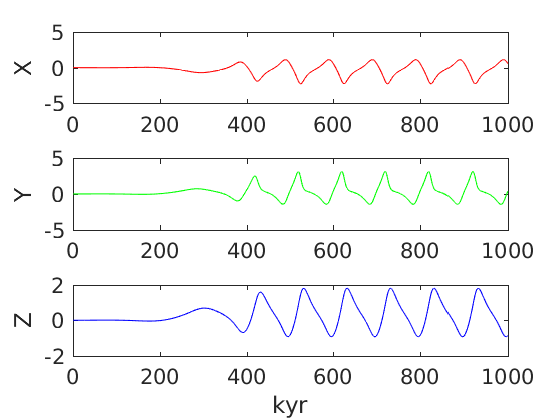

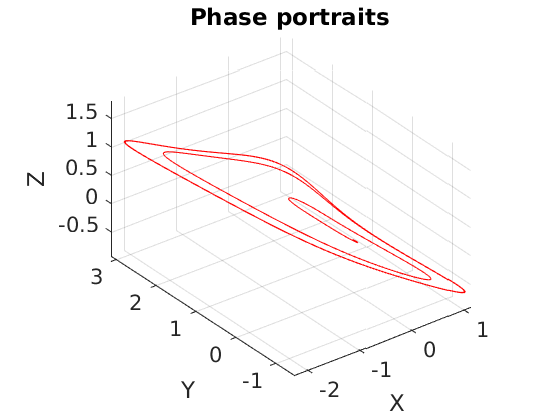

In [3]:
[X Y Z]=climate(1,0.8,0.8,1.2);